## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./assets/real_estate.csv', delimiter=';', error_bad_lines=False)
print(df.info())
print(df.columns)

/tmp/ipykernel_1324/393061966.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./assets/real_estate.csv', delimiter=';', error_bad_lines=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [14]:
import numpy as np
import pandas as pd

df = pd.read_csv('./assets/real_estate.csv', delimiter=';')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [19]:
df.describe()
#print(df.columns)
#print(df.head(10))

,Unnamed: 0,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,zipCode,customZone
count,15335.000000,1.533500e+04,1.454100e+04,14982.000000,14990.000000,14085.000000,1.533500e+04,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.000000,0.0,0.0
mean,7668.000000,1.524371e+08,9.143423e+08,3.231611,2.150233,196.916436,4.773036e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166873,NaN,NaN
std,4426.977524,2.277286e+06,7.516036e+06,1.393106,1.292079,2182.758313,5.912942e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372875,NaN,NaN
min,1.000000,1.221584e+08,8.762742e+08,1.000000,1.000000,15.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,3834.500000,1.519456e+08,9.113649e+08,2.000000,1.000000,80.000000,1.690000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
50%,7668.000000,1.532413e+08,9.121841e+08,3.000000,2.000000,114.000000,2.800000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
75%,11501.500000,1.538105e+08,9.148904e+08,4.000000,3.000000,205.000000,5.400000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
max,15335.000000,1.540033e+08,9.887761e+08,30.000000,20.000000,249000.000000,8.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,NaN


#### What is the most expensive home in the dataset? (★☆☆)

In [21]:
max_price =df['price'].max()
print("Max Price: \n",max_price)

Max Price: 
 8500000


#### What is cheapest home in the dataset? (★☆☆)

In [22]:
min_price =df['price'].min()
print("Min Price: \n",min_price)

Min Price: 
 0


#### What is the biggest and the smallest home in the dataset? (★☆☆)

#### How many populations (level5) the dataset contains? (★☆☆)

#### Does the dataset contain NAs? (★☆☆)


#### Delete the NAs of the dataset, if applicable (★★☆)

#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

/tmp/ipykernel_1324/436372427.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('./assets/real_estate.csv', delimiter=';', error_bad_lines=False)


<AxesSubplot:>

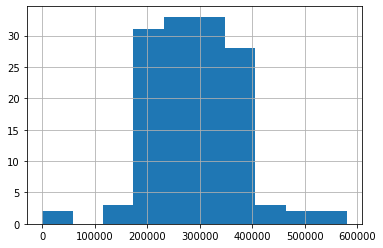

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('./assets/real_estate.csv', delimiter=';', error_bad_lines=False)

#Pobl_Arr0 = filter[data['level5']]
data_filter = data[data['level5'] == "Arroyomolinos (Madrid)"]
data_filter
data_filter['price'].hist()

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

#### Make a bar plot of the median of prices (★★★) 

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

#### What is the most expensive home of each population? (★★☆) 

In [33]:
column = df["price"]
max_index = column.idxmax()
print(f"The id of the most expensive house is {max_index}")

The id of the most expensive house is 13110


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [ ]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

#### What happens if we do the same analysis for price/m2 (★★☆) 

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

#### How many  real estate agencies the dataset contains? (★★☆) 

#### What is the population (level 5) that contains the most houses? (★★☆) 